In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
import spectral.io.envi as envi
import spectral

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
file = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b"
header = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.hdr"

#file = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/brc961-br1001/brc961-br1001"
#header = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/brc961-br1001/brc961-br1001.hdr"

file = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/br1003-br2085b/br1003-br2085b"
header = r"/media/conor/Maxtor/Breast_Cancer_US_dataset/br1003-br2085b/br1003-br2085b.hdr"

img = envi.open(header, file)

In [36]:
import sys

In [37]:
sys.executable

'/home/conor/miniconda3/bin/python'

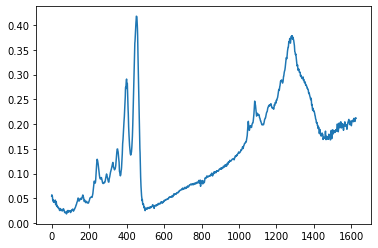

In [38]:
%timeit

plt.plot(img.read_pixel(2100,230))

In [39]:
wavenumbers = {i: int(float(wn)) for i, wn in enumerate(img.metadata["wavelength"])}

In [40]:
wavenumbers

{0: 750,
 1: 752,
 2: 754,
 3: 756,
 4: 758,
 5: 760,
 6: 762,
 7: 764,
 8: 766,
 9: 768,
 10: 770,
 11: 772,
 12: 774,
 13: 776,
 14: 778,
 15: 780,
 16: 782,
 17: 784,
 18: 786,
 19: 788,
 20: 790,
 21: 792,
 22: 794,
 23: 796,
 24: 798,
 25: 800,
 26: 802,
 27: 804,
 28: 806,
 29: 808,
 30: 810,
 31: 812,
 32: 814,
 33: 816,
 34: 818,
 35: 820,
 36: 822,
 37: 824,
 38: 826,
 39: 828,
 40: 830,
 41: 832,
 42: 834,
 43: 836,
 44: 838,
 45: 840,
 46: 842,
 47: 844,
 48: 846,
 49: 848,
 50: 850,
 51: 852,
 52: 854,
 53: 856,
 54: 858,
 55: 860,
 56: 862,
 57: 864,
 58: 866,
 59: 868,
 60: 870,
 61: 872,
 62: 874,
 63: 876,
 64: 878,
 65: 880,
 66: 882,
 67: 884,
 68: 886,
 69: 888,
 70: 890,
 71: 892,
 72: 894,
 73: 896,
 74: 898,
 75: 900,
 76: 902,
 77: 904,
 78: 906,
 79: 908,
 80: 910,
 81: 912,
 82: 914,
 83: 916,
 84: 918,
 85: 920,
 86: 922,
 87: 924,
 88: 926,
 89: 928,
 90: 930,
 91: 932,
 92: 934,
 93: 936,
 94: 938,
 95: 940,
 96: 942,
 97: 944,
 98: 946,
 99: 948,
 100: 950,

In [5]:
amide_1 = img.read_band(450)[:,3200:]

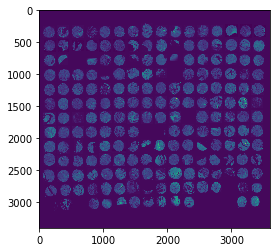

In [6]:
plt.imshow(amide_1)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


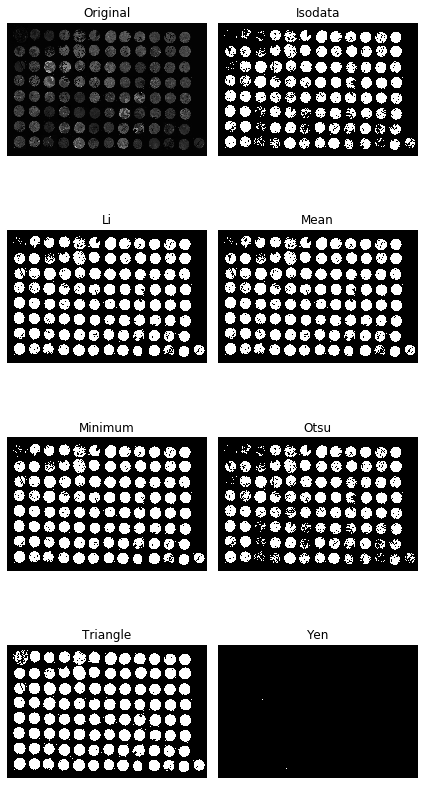

In [11]:
from skimage.filters import try_all_threshold

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(amide_1, figsize=(6, 12), verbose=True)
plt.show()

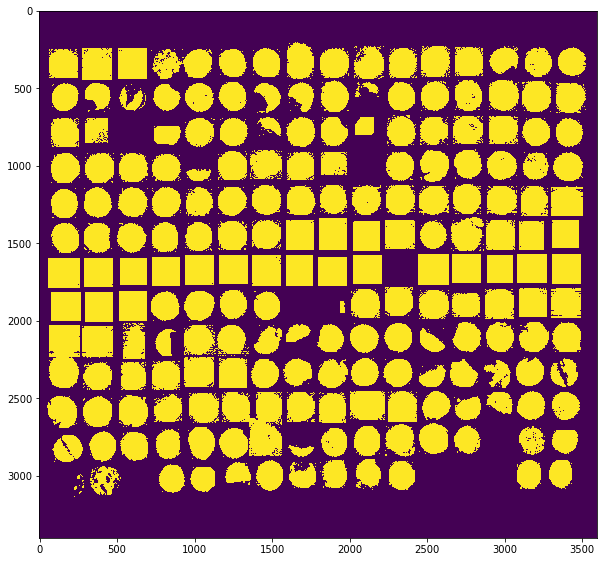

In [7]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(amide_1 > 0.01)

# Import label assignments from excel

In [9]:
specs = pd.read_csv("/home/conor/Desktop/2085-b/BR2085b specs.csv").iloc[9:,:]

specs.columns = specs.loc[9]
specs.drop(9, axis = 0, inplace = True)

In [28]:
specs.head(15)

9,Position,No.,Age,Sex,Organ/Anatomic Site,Pathology diagnosis,TNM,Grade,Stage,Type,Tissue ID.,Region Label,Region Label_2
10,A1,1,42,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T3N1M0,1,NaN,malignant,167275B,45,65
11,A2,2,38,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T3N0M0,1,NaN,malignant,170219B,31,41
12,A3,3,42,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T3N0M0,1,NaN,malignant,Fmg050799,35,50
13,A4,4,35,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T3N1M0,-,NaN,malignant,Fmg050757,57,80
14,A5,5,45,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T4N1M0,1,NaN,malignant,170940B,43,58
15,A6,6,41,F,Breast,Infiltrating duct carcinoma not otherwise spec...,-,1,NaN,malignant,174180B,41,60
16,A7,7,60,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T4N1M0,1,NaN,malignant,172001B,25,44
17,A8,8,45,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T2NxM0,1 -- 2,NaN,malignant,Fmg050826,4,5
18,A9,9,60,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T2N1M0,1,NaN,malignant,167246B,34,48
19,A10,10,40,F,Breast,Infiltrating duct carcinoma not otherwise spec...,T2N0M0,1 -- 2,NaN,malignant,167899B,28,37


In [11]:
region_dict = dict(zip(specs[~specs["Region Label_2"].isna()]["Region Label_2"].astype(int), specs[~specs["Region Label_2"].isna()]["Position"]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


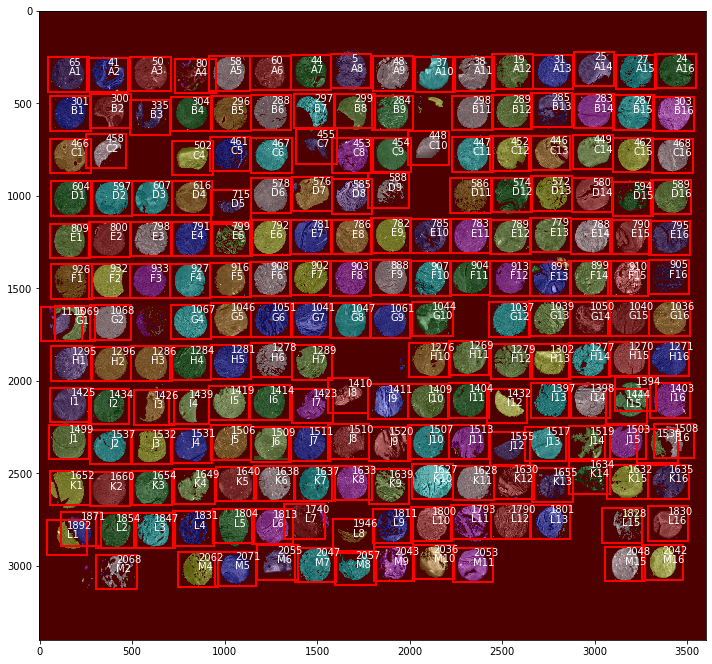

In [13]:
from skimage.filters import threshold_otsu\
, threshold_triangle, threshold_mean\
, sobel, threshold_li, threshold_minimum\
, threshold_isodata

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches

image = amide_1

#cleared = clear_border(bw)
cleared = clear_border(amide_1 > 0.05)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_label_overlay)

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

# Factor to increase crop area around TMA core
f_ = 1

for region in regions:
    
    # take regions with large enough areas which are roughly circular
    if region.area >= 5000:
        #if ((region.bbox[0] - region.bbox[1])/(region.bbox[2] - region.bbox[3])) > 1.5:
        # draw rectangle around segmented coins
        
        try:
            minr, minc, maxr, maxc = biggest.bbox
            
            top_left = (region.centroid[1]-((f_)*(maxc-minc)/2),
                        region.centroid[0]-((f_)*(maxr-minr)/2))
            
            vert_side, horiz_side = f_*(maxc-minc), f_*(maxr-minr)
            #vert_side, horiz_side = 211, 249
            
            rect = mpatches.Rectangle(top_left, vert_side, horiz_side,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            ax.text(region.centroid[1], region.centroid[0]-50, region.label, color = "w")
            ax.text(region.centroid[1], region.centroid[0], region_dict[region.label], color = "w")
            
        except: pass 

plt.tight_layout()
plt.show()

# Create spec files and save label images

In [14]:
import scipy
from skimage.color import gray2rgb

import imageio
import matplotlib

In [15]:
tissue_colours = dict(zip(plt.cm.tab10.colors, ["blood", "coll", "epith", "fibro", "lymph", "myo", "necrosis"]))

This is for separating the datasets into datacubes for each core and the labelled image

In [87]:
from tqdm import tqdm

TMA = "961"
offset = 0

f = 1.15

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

#masks = {name: imageio.imread(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\masks\{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}
masks = {name: imageio.imread("/home/conor/Desktop/BRC{}/masks/BR{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}


for i, region in enumerate(tqdm([image for image in regionprops(label_image) if image.area >= 5000])):
    
    # Skip any regions not in the metadata
    try: region_dict[region.label]
    except: continue
        
    #if region_dict[region.label][0] not in ["H","I","J","K","L","M"]: continue
    
    #print(region.label)
        
    #if i not in [14]: continue
    
    bbox = region.bbox # Get bounding box of the segmented image
    
    minr, minc, maxr, maxc = biggest.bbox # BBOX of largest segment
    
    # Get coordinates of region using biggest bounding box
    t = int(np.floor((region.centroid[0] - (maxr-minr)*f/2)))
    b = int(np.floor((region.centroid[0] + (maxr-minr)*f/2)))
    
    l = int(np.floor((region.centroid[1] - (maxc-minc)*f/2)))
    r = int(np.floor((region.centroid[1] + (maxc-minc)*f/2)))
    
    if r-l == 314 : r = r - 1
    if b-t == 347: b = b - 1
    
    print(r-l, b-t)
    
    #continue
    
    datacube = img.read_subregion([t, b], [offset+l, offset+r]) # Get the cropped datacube
    temp_im = gray2rgb(datacube.mean(axis = 2))

    # Create empty image for label
    label_img = np.zeros((temp_im.shape[0], temp_im.shape[1], 3), dtype = np.uint8)
    
    # Look up the region label reference to get core ID
    core = region_dict[region.label]

    envi.save_image("/home/conor/Desktop/BRC{}/datacubes/{}.HDR".format(TMA, core)
                , datacube
                , metadata = {"Name": core, "Wavelengths": img.metadata["wavelength"]}
                , force = True)
    
    del datacube

    # Label image using the appropriate tissue type.
    for colour, name in tissue_colours.items():
        
        labels = masks[name]
        cropped_labels = labels[t:b, l:r]
        
        # Apply mask to blank image to get colour
        temp_im[cropped_labels > 1] = np.array(colour)
        
        #scipy.misc.imsave(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\{}.jpg".format(name, region.label), label_img)
        
    imageio.imsave("/home/conor/Desktop/BRC{}/labelled_cores/{}.png".format(TMA, region_dict[region.label]), temp_im)




  0%|          | 0/99 [00:00<?, ?it/s]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A5.img


Lossy conversion from float32 to uint8. Range [-0.001858033356256783, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  1%|          | 1/99 [01:44<2:50:00, 104.09s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A2.img


Lossy conversion from float32 to uint8. Range [-0.001397378626279533, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



  2%|▏         | 2/99 [04:16<3:11:31, 118.47s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A4.img


Lossy conversion from float32 to uint8. Range [-0.003369752550497651, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  4%|▍         | 4/99 [05:04<2:22:45, 90.17s/it] 

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A6.img


Lossy conversion from float32 to uint8. Range [-0.002155767986550927, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



  6%|▌         | 6/99 [07:38<2:13:39, 86.23s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A3.img


Lossy conversion from float32 to uint8. Range [-0.0007183853886090219, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  7%|▋         | 7/99 [09:58<2:37:05, 102.45s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A7.img


Lossy conversion from float32 to uint8. Range [-0.0016703754663467407, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



  8%|▊         | 8/99 [11:45<2:37:18, 103.72s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A8.img


Lossy conversion from float32 to uint8. Range [-0.001060593407601118, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



  9%|▉         | 9/99 [14:16<2:57:03, 118.04s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A9.img


Lossy conversion from float32 to uint8. Range [-0.001341604976914823, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 10%|█         | 10/99 [16:20<2:57:38, 119.75s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A10.img


Lossy conversion from float32 to uint8. Range [-0.0014874907210469246, 0.46957558393478394]. Convert image to uint8 prior to saving to suppress this warning.



 11%|█         | 11/99 [18:28<2:59:13, 122.20s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A12.img


Lossy conversion from float32 to uint8. Range [-0.0014715035213157535, 0.609224259853363]. Convert image to uint8 prior to saving to suppress this warning.



 12%|█▏        | 12/99 [21:01<3:10:45, 131.56s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/A11.img


Lossy conversion from float32 to uint8. Range [-0.0016188420122489333, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 13%|█▎        | 13/99 [21:55<2:35:11, 108.27s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B4.img


Lossy conversion from float32 to uint8. Range [-0.0012869733618572354, 0.693365216255188]. Convert image to uint8 prior to saving to suppress this warning.



 14%|█▍        | 14/99 [25:04<3:07:34, 132.40s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B5.img


Lossy conversion from float32 to uint8. Range [-0.002432476030662656, 0.38063153624534607]. Convert image to uint8 prior to saving to suppress this warning.



 15%|█▌        | 15/99 [28:12<3:28:39, 149.04s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B6.img


Lossy conversion from float32 to uint8. Range [-0.0024867381434887648, 0.7534371018409729]. Convert image to uint8 prior to saving to suppress this warning.



 16%|█▌        | 16/99 [30:00<3:09:00, 136.63s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B7.img


Lossy conversion from float32 to uint8. Range [-0.0009351815679110587, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 17%|█▋        | 17/99 [32:11<3:04:26, 134.95s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B9.img


Lossy conversion from float32 to uint8. Range [-0.0010816336143761873, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 18%|█▊        | 18/99 [34:25<3:02:00, 134.82s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B12.img


Lossy conversion from float32 to uint8. Range [-0.0011996686225757003, 0.5880182981491089]. Convert image to uint8 prior to saving to suppress this warning.



 19%|█▉        | 19/99 [36:55<3:05:55, 139.44s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B10.img


Lossy conversion from float32 to uint8. Range [-0.0010688112815842032, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 20%|██        | 20/99 [37:13<2:15:34, 102.97s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B3.img


Lossy conversion from float32 to uint8. Range [-0.0010153029579669237, 0.6244878172874451]. Convert image to uint8 prior to saving to suppress this warning.



 21%|██        | 21/99 [39:04<2:16:58, 105.37s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B11.img


Lossy conversion from float32 to uint8. Range [-0.0015896857948973775, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 22%|██▏       | 22/99 [39:17<1:39:35, 77.60s/it] 

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B8.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 23%|██▎       | 23/99 [41:26<1:57:48, 93.00s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B2.img


Lossy conversion from float32 to uint8. Range [-0.0008131376234814525, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 24%|██▍       | 24/99 [43:02<1:57:27, 93.97s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/B1.img


Lossy conversion from float32 to uint8. Range [-0.005106196738779545, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 25%|██▌       | 25/99 [43:42<1:35:57, 77.81s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C5.img


Lossy conversion from float32 to uint8. Range [-0.0024867381434887648, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 26%|██▋       | 26/99 [46:51<2:15:10, 111.11s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C3.img


Lossy conversion from float32 to uint8. Range [-0.00044746804633177817, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 27%|██▋       | 27/99 [49:59<2:40:54, 134.08s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C1.img


Lossy conversion from float32 to uint8. Range [-0.005106196738779545, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 28%|██▊       | 28/99 [51:06<2:15:04, 114.14s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C2.img


Lossy conversion from float32 to uint8. Range [-0.00016004990902729332, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 30%|███       | 30/99 [53:03<1:52:03, 97.44s/it] 

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C6.img


Lossy conversion from float32 to uint8. Range [-0.0016791962552815676, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 31%|███▏      | 31/99 [54:55<1:55:09, 101.62s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C4.img


Lossy conversion from float32 to uint8. Range [-0.0011216213461011648, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 32%|███▏      | 32/99 [56:00<1:41:20, 90.75s/it] 

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C12.img


Lossy conversion from float32 to uint8. Range [-0.0007005385123193264, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 33%|███▎      | 33/99 [58:18<1:55:19, 104.85s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C7.img


Lossy conversion from float32 to uint8. Range [-0.002174834255129099, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 34%|███▍      | 34/99 [59:58<1:52:00, 103.40s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C8.img


Lossy conversion from float32 to uint8. Range [-0.001153778051957488, 0.6329144239425659]. Convert image to uint8 prior to saving to suppress this warning.



 35%|███▌      | 35/99 [1:00:46<1:32:30, 86.72s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C10.img


Lossy conversion from float32 to uint8. Range [-0.00040123690268956125, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 36%|███▋      | 36/99 [1:01:12<1:11:55, 68.51s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C9.img


Lossy conversion from float32 to uint8. Range [-0.0009507217910140753, 0.3355064392089844]. Convert image to uint8 prior to saving to suppress this warning.



 37%|███▋      | 37/99 [1:01:22<52:40, 50.97s/it]  

313 346
Saving /home/conor/Desktop/BRC961/datacubes/C11.img


Lossy conversion from float32 to uint8. Range [-0.0011009734589606524, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 38%|███▊      | 38/99 [1:01:38<41:18, 40.63s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D1.img


Lossy conversion from float32 to uint8. Range [-0.0023330755066126585, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 39%|███▉      | 39/99 [1:04:36<1:21:53, 81.89s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D2.img


Lossy conversion from float32 to uint8. Range [-0.0005494270590133965, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 40%|████      | 40/99 [1:07:46<1:52:11, 114.10s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D3.img


Lossy conversion from float32 to uint8. Range [-0.0005730981938540936, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 41%|████▏     | 41/99 [1:09:18<1:43:59, 107.57s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D5.img


Lossy conversion from float32 to uint8. Range [-0.0025399092119187117, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 42%|████▏     | 42/99 [1:12:05<1:59:06, 125.38s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D4.img


Lossy conversion from float32 to uint8. Range [-0.0009785669390112162, 1.0]. Convert image to uint8 prior to saving to suppress this warning.



 43%|████▎     | 43/99 [1:13:50<1:51:19, 119.28s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D6.img


Lossy conversion from float32 to uint8. Range [-0.002402721671387553, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 44%|████▍     | 44/99 [1:15:14<1:39:37, 108.69s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D7.img


Lossy conversion from float32 to uint8. Range [-5.890001921216026e-05, 0.6850684285163879]. Convert image to uint8 prior to saving to suppress this warning.



 45%|████▌     | 45/99 [1:17:58<1:52:39, 125.18s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D8.img


Lossy conversion from float32 to uint8. Range [-0.001432885997928679, 0.6186225414276123]. Convert image to uint8 prior to saving to suppress this warning.



 46%|████▋     | 46/99 [1:19:13<1:37:27, 110.33s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D12.img


Lossy conversion from float32 to uint8. Range [-0.0016399131854996085, 0.47968146204948425]. Convert image to uint8 prior to saving to suppress this warning.



 47%|████▋     | 47/99 [1:21:34<1:43:30, 119.44s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D10.img


Lossy conversion from float32 to uint8. Range [-0.000644998624920845, 0.6583816409111023]. Convert image to uint8 prior to saving to suppress this warning.



 48%|████▊     | 48/99 [1:21:45<1:13:47, 86.81s/it] 

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D11.img


Lossy conversion from float32 to uint8. Range [-0.002191417384892702, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 49%|████▉     | 49/99 [1:22:07<56:11, 67.43s/it]  

313 346
Saving /home/conor/Desktop/BRC961/datacubes/D9.img


Lossy conversion from float32 to uint8. Range [-0.001061612507328391, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 51%|█████     | 50/99 [1:22:17<40:57, 50.14s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E1.img


Lossy conversion from float32 to uint8. Range [-0.0008177265408448875, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 52%|█████▏    | 51/99 [1:25:24<1:13:07, 91.42s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E2.img


Lossy conversion from float32 to uint8. Range [-0.001271357061341405, 0.40671876072883606]. Convert image to uint8 prior to saving to suppress this warning.



 53%|█████▎    | 52/99 [1:28:34<1:34:37, 120.80s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E3.img


Lossy conversion from float32 to uint8. Range [-0.0014567578909918666, 0.5124220848083496]. Convert image to uint8 prior to saving to suppress this warning.



 54%|█████▎    | 53/99 [1:30:28<1:31:11, 118.94s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E6.img


Lossy conversion from float32 to uint8. Range [-0.003106494899839163, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 55%|█████▍    | 54/99 [1:33:50<1:47:51, 143.80s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E4.img


Lossy conversion from float32 to uint8. Range [-0.002099288161844015, 0.4601421058177948]. Convert image to uint8 prior to saving to suppress this warning.



 56%|█████▌    | 55/99 [1:35:48<1:39:48, 136.10s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E5.img


Lossy conversion from float32 to uint8. Range [-0.0031231450848281384, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 57%|█████▋    | 56/99 [1:36:20<1:15:05, 104.77s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E8.img


Lossy conversion from float32 to uint8. Range [-0.0011419961228966713, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 58%|█████▊    | 57/99 [1:39:09<1:26:47, 123.98s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E7.img


Lossy conversion from float32 to uint8. Range [-0.001906045712530613, 0.5490196347236633]. Convert image to uint8 prior to saving to suppress this warning.



 59%|█████▊    | 58/99 [1:40:37<1:17:19, 113.16s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E9.img


Lossy conversion from float32 to uint8. Range [-0.0010793203255161643, 0.6941514611244202]. Convert image to uint8 prior to saving to suppress this warning.



 60%|█████▉    | 59/99 [1:42:35<1:16:31, 114.78s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E10.img


Lossy conversion from float32 to uint8. Range [-0.0012463529128581285, 0.6180999279022217]. Convert image to uint8 prior to saving to suppress this warning.



 61%|██████    | 60/99 [1:44:20<1:12:40, 111.82s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E11.img


Lossy conversion from float32 to uint8. Range [-0.0011269461829215288, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 62%|██████▏   | 61/99 [1:46:07<1:09:55, 110.40s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/E12.img


Lossy conversion from float32 to uint8. Range [-0.0015297161880880594, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 63%|██████▎   | 62/99 [1:48:38<1:15:32, 122.51s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F1.img


Lossy conversion from float32 to uint8. Range [-0.000948283530306071, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 64%|██████▎   | 63/99 [1:51:45<1:25:03, 141.76s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F2.img


Lossy conversion from float32 to uint8. Range [-0.0010386529611423612, 0.39684268832206726]. Convert image to uint8 prior to saving to suppress this warning.



 65%|██████▍   | 64/99 [1:54:54<1:31:04, 156.12s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F3.img


Lossy conversion from float32 to uint8. Range [-0.0005108682671561837, 0.5490196347236633]. Convert image to uint8 prior to saving to suppress this warning.



 66%|██████▌   | 65/99 [1:56:11<1:15:01, 132.39s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F4.img


Lossy conversion from float32 to uint8. Range [-0.002117607742547989, 0.6813275814056396]. Convert image to uint8 prior to saving to suppress this warning.



 67%|██████▋   | 66/99 [1:58:57<1:18:14, 142.25s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F5.img


Lossy conversion from float32 to uint8. Range [-0.00030185567447915673, 0.7411764860153198]. Convert image to uint8 prior to saving to suppress this warning.



 68%|██████▊   | 67/99 [2:00:53<1:11:42, 134.44s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F7.img


Lossy conversion from float32 to uint8. Range [-0.0026383933145552874, 0.6717453002929688]. Convert image to uint8 prior to saving to suppress this warning.



 69%|██████▊   | 68/99 [2:02:33<1:04:04, 124.01s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F9.img


Lossy conversion from float32 to uint8. Range [-6.94553236826323e-05, 0.7411764860153198]. Convert image to uint8 prior to saving to suppress this warning.



 70%|██████▉   | 69/99 [2:05:34<1:10:39, 141.31s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F6.img


Lossy conversion from float32 to uint8. Range [-0.003106494899839163, 0.5490196347236633]. Convert image to uint8 prior to saving to suppress this warning.



 71%|███████   | 70/99 [2:07:56<1:08:19, 141.35s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F8.img


Lossy conversion from float32 to uint8. Range [-0.0018439923878759146, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 72%|███████▏  | 71/99 [2:09:31<59:32, 127.61s/it]  

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F10.img


Lossy conversion from float32 to uint8. Range [-0.0010196686489507556, 0.45391038060188293]. Convert image to uint8 prior to saving to suppress this warning.



 73%|███████▎  | 72/99 [2:12:32<1:04:33, 143.45s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F11.img


Lossy conversion from float32 to uint8. Range [-0.0011003492400050163, 0.4928279221057892]. Convert image to uint8 prior to saving to suppress this warning.



 74%|███████▎  | 73/99 [2:13:54<54:17, 125.28s/it]  

313 346
Saving /home/conor/Desktop/BRC961/datacubes/F12.img


Lossy conversion from float32 to uint8. Range [-0.0010075545869767666, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 75%|███████▍  | 74/99 [2:15:41<49:50, 119.62s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G1.img


Lossy conversion from float32 to uint8. Range [-0.0007141971727833152, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 76%|███████▌  | 75/99 [2:18:50<56:12, 140.52s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G2.img


Lossy conversion from float32 to uint8. Range [-0.0010175902862101793, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 77%|███████▋  | 76/99 [2:21:21<55:03, 143.61s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G3.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 78%|███████▊  | 77/99 [2:24:19<56:25, 153.88s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G5.img


Lossy conversion from float32 to uint8. Range [-1.0394302080385387e-05, 0.7058823704719543]. Convert image to uint8 prior to saving to suppress this warning.



 79%|███████▉  | 78/99 [2:27:13<56:01, 160.05s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G7.img


Lossy conversion from float32 to uint8. Range [-0.002523768227547407, 0.5603702664375305]. Convert image to uint8 prior to saving to suppress this warning.



 80%|███████▉  | 79/99 [2:30:01<54:05, 162.27s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G4.img


Lossy conversion from float32 to uint8. Range [-0.002929979469627142, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 81%|████████  | 80/99 [2:32:34<50:30, 159.52s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G8.img


Lossy conversion from float32 to uint8. Range [-0.0003937326546292752, 0.6317716836929321]. Convert image to uint8 prior to saving to suppress this warning.



 82%|████████▏ | 81/99 [2:35:16<48:07, 160.40s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G6.img


Lossy conversion from float32 to uint8. Range [-0.002889599185436964, 0.5110793113708496]. Convert image to uint8 prior to saving to suppress this warning.



 83%|████████▎ | 82/99 [2:36:11<36:29, 128.80s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G10.img


Lossy conversion from float32 to uint8. Range [-0.0005698837921954691, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 84%|████████▍ | 83/99 [2:38:55<37:09, 139.36s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G9.img


Lossy conversion from float32 to uint8. Range [-0.0020809543784707785, 0.8392156958580017]. Convert image to uint8 prior to saving to suppress this warning.



 85%|████████▍ | 84/99 [2:39:30<26:59, 107.97s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G11.img


Lossy conversion from float32 to uint8. Range [-0.0012964888010174036, 0.433379203081131]. Convert image to uint8 prior to saving to suppress this warning.



 86%|████████▌ | 85/99 [2:42:26<29:57, 128.42s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/G12.img


Lossy conversion from float32 to uint8. Range [-0.00048417982179671526, 0.7411764860153198]. Convert image to uint8 prior to saving to suppress this warning.



 87%|████████▋ | 86/99 [2:45:32<31:31, 145.48s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H1.img


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



 88%|████████▊ | 87/99 [2:48:41<31:45, 158.78s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H3.img


Lossy conversion from float32 to uint8. Range [-0.0010175902862101793, 0.8901960849761963]. Convert image to uint8 prior to saving to suppress this warning.



 89%|████████▉ | 88/99 [2:51:53<30:54, 168.55s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H2.img


Lossy conversion from float32 to uint8. Range [-0.001145053538493812, 0.6274510025978088]. Convert image to uint8 prior to saving to suppress this warning.



 90%|████████▉ | 89/99 [2:54:15<26:47, 160.80s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H5.img


Lossy conversion from float32 to uint8. Range [-0.002156104426831007, 0.5294407606124878]. Convert image to uint8 prior to saving to suppress this warning.



 91%|█████████ | 90/99 [2:56:09<22:00, 146.70s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H7.img


Lossy conversion from float32 to uint8. Range [-0.000885691144503653, 0.7270985245704651]. Convert image to uint8 prior to saving to suppress this warning.



 92%|█████████▏| 91/99 [2:58:32<19:25, 145.67s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/H4.img


Lossy conversion from float32 to uint8. Range [-0.003928505349904299, 0.27925923466682434]. Convert image to uint8 prior to saving to suppress this warning.



 93%|█████████▎| 92/99 [2:59:48<14:31, 124.49s/it]

313 346
Saving /home/conor/Desktop/BRC961/datacubes/I1.img


IndexError: boolean index did not match indexed array along dimension 1; dimension is 313 but corresponding boolean dimension is 271

In [52]:
TMA_dict = dict()

This is for extacting the pixels from each core by the pathologists labelling.

In [53]:
from tqdm import tqdm

TMA = "2085-b"
offset = 0

f = 1.15

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

#masks = {name: imageio.imread(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\masks\{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}
masks = {name: imageio.imread("/home/conor/Desktop/{}/masks/{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}

for i, region in enumerate(tqdm([image for image in regionprops(label_image) if image.area >= 5000])):
    
    # Skip any regions not in the metadata
    try: region_dict[region.label]
    except: continue
        
    if region_dict[region.label] in TMA_dict.keys(): continue
        
    print(region_dict[region.label])
    
    bbox = region.bbox # Get bounding box of the segmented image
    
    minr, minc, maxr, maxc = biggest.bbox # BBOX of largest segment
    
    # Get coordinates of region using biggest bounding box
    t = int(np.floor((region.centroid[0] - (maxr-minr)*f/2)))
    b = int(np.floor((region.centroid[0] + (maxr-minr)*f/2)))
    
    l = int(np.floor((region.centroid[1] - (maxc-minc)*f/2)))
    r = int(np.floor((region.centroid[1] + (maxc-minc)*f/2)))
    
    #if r-l == 314 : r = r - 1
    #if b-t == 347: b = b - 1
    
    print(r-l, b-t)
    
    datacube = img.read_subregion([t, b], [offset+l, offset+r]) # Get the cropped datacube
    temp_im = gray2rgb(datacube.mean(axis = 2))
    
    # Create empty image for label
    label_img = np.zeros((temp_im.shape[0], temp_im.shape[1], 3), dtype = np.uint8)
    
    # Look up the region label reference to get core ID
    core = region_dict[region.label]
    
    core_dict = dict()
    
    # Label image using the appropriate tissue type.
    for colour, name in tissue_colours.items():
        
        labels = masks[name]
        cropped_labels = labels[t:b, l:r]
        
        # Apply mask to blank image to get colour
        try: 
            core_dict[name] = pd.DataFrame(datacube[cropped_labels > 1], columns = img.metadata["wavelength"])
            
        except:     
            print(region_dict[region.label])
        
    try: TMA_dict[core] = pd.concat(core_dict)
    except: pass

TMA_df = pd.concat(TMA_dict)




  0%|          | 0/199 [00:00<?, ?it/s]

A8
252 213





  1%|          | 1/199 [01:58<6:29:49, 118.13s/it]

A12
252 214





  1%|          | 2/199 [03:56<6:27:48, 118.11s/it]

A16
252 214





  2%|▏         | 3/199 [05:53<6:25:29, 118.01s/it]

A14
252 214





  2%|▏         | 4/199 [07:51<6:23:23, 117.97s/it]

A15
252 214





  3%|▎         | 5/199 [09:49<6:21:19, 117.93s/it]

A13
252 214





  3%|▎         | 6/199 [11:47<6:19:24, 117.95s/it]

A10
252 214





  4%|▎         | 7/199 [13:46<6:17:52, 118.09s/it]

A11
252 214





  4%|▍         | 8/199 [15:44<6:16:25, 118.25s/it]

A2
251 214





  5%|▍         | 9/199 [17:43<6:14:55, 118.40s/it]

A7
252 214





  5%|▌         | 10/199 [19:43<6:14:10, 118.79s/it]

A9
251 214





  6%|▌         | 11/199 [21:39<6:10:06, 118.12s/it]

A3
251 214





  6%|▌         | 12/199 [23:30<6:01:33, 116.01s/it]

A5
252 213





  7%|▋         | 13/199 [25:21<5:54:55, 114.49s/it]

A6
251 214





  7%|▋         | 14/199 [27:03<5:40:56, 110.58s/it]

A1
252 214





  8%|▊         | 15/199 [28:07<4:56:08, 96.57s/it] 

A4
252 214





  8%|▊         | 16/199 [28:46<4:02:41, 79.57s/it]

B14
252 214





  9%|▊         | 17/199 [30:41<4:32:58, 89.99s/it]

B9
252 214





  9%|▉         | 18/199 [32:35<4:52:59, 97.12s/it]

B13
252 214





 10%|▉         | 19/199 [34:05<4:45:41, 95.23s/it]

B15
252 213





 10%|█         | 20/199 [35:31<4:35:05, 92.21s/it]

B6
252 213





 11%|█         | 21/199 [36:34<4:07:40, 83.49s/it]

B12
252 214





 11%|█         | 22/199 [37:26<3:38:40, 74.13s/it]

B5
252 214





 12%|█▏        | 23/199 [38:05<3:06:10, 63.47s/it]

B7
252 214





 12%|█▏        | 24/199 [38:34<2:35:23, 53.28s/it]

B11
252 214





 13%|█▎        | 25/199 [38:39<1:52:20, 38.74s/it]

B8
252 214





 13%|█▎        | 26/199 [38:40<1:19:04, 27.43s/it]

B2
252 214





 14%|█▎        | 27/199 [39:44<1:50:02, 38.39s/it]

B1
252 214





 14%|█▍        | 28/199 [40:08<1:36:52, 33.99s/it]

B16
252 214





 15%|█▍        | 29/199 [41:16<2:05:38, 44.35s/it]

B4
252 214





 15%|█▌        | 30/199 [41:16<1:27:40, 31.13s/it]

B3
252 214





 16%|█▌        | 31/199 [41:42<1:22:27, 29.45s/it]

C13
252 214





 16%|█▌        | 32/199 [43:36<2:32:49, 54.91s/it]

C11
252 214





 17%|█▋        | 33/199 [45:32<3:22:06, 73.05s/it]

C10
252 214





 17%|█▋        | 34/199 [47:12<3:43:48, 81.39s/it]

C14
252 214





 18%|█▊        | 35/199 [48:45<3:51:54, 84.85s/it]

C12
252 214





 18%|█▊        | 36/199 [50:02<3:43:40, 82.33s/it]

C8
252 214





 19%|█▊        | 37/199 [50:50<3:14:16, 71.95s/it]

C9
252 214





 19%|█▉        | 38/199 [51:05<2:27:40, 55.03s/it]

C7
252 214





 20%|█▉        | 39/199 [52:10<2:34:20, 57.88s/it]

C2
251 214





 20%|██        | 40/199 [53:25<2:47:15, 63.12s/it]

C5
252 214





 21%|██        | 41/199 [53:57<2:21:45, 53.83s/it]

C15
252 214





 21%|██        | 42/199 [55:17<2:41:12, 61.61s/it]

C1
252 214





 22%|██▏       | 43/199 [56:09<2:33:06, 58.88s/it]

C6
252 214





 22%|██▏       | 44/199 [57:00<2:25:29, 56.32s/it]

C16
252 214





 23%|██▎       | 45/199 [57:21<1:57:53, 45.93s/it]

C4
252 214





 23%|██▎       | 46/199 [57:42<1:37:34, 38.27s/it]

D13
251 214





 24%|██▎       | 47/199 [59:36<2:34:14, 60.89s/it]

D12
252 214





 24%|██▍       | 48/199 [1:01:28<3:11:51, 76.23s/it]

D7
252 214





 25%|██▍       | 49/199 [1:02:52<3:16:32, 78.62s/it]

D6
252 214





 25%|██▌       | 50/199 [1:03:42<2:54:01, 70.08s/it]

D14
252 214





 26%|██▌       | 51/199 [1:04:43<2:46:20, 67.44s/it]

D8
252 214





 26%|██▌       | 52/199 [1:05:29<2:29:27, 61.00s/it]

D11
252 214





 27%|██▋       | 53/199 [1:05:44<1:54:52, 47.21s/it]

D9
252 214





 27%|██▋       | 54/199 [1:06:14<1:41:25, 41.97s/it]

D16
252 214





 28%|██▊       | 55/199 [1:07:27<2:02:57, 51.23s/it]

D15
252 214





 28%|██▊       | 56/199 [1:07:56<1:46:35, 44.72s/it]

D2
252 213





 29%|██▊       | 57/199 [1:09:06<2:03:50, 52.33s/it]

D1
252 214





 29%|██▉       | 58/199 [1:09:28<1:41:20, 43.13s/it]

D3
252 214





 30%|██▉       | 59/199 [1:10:06<1:36:48, 41.49s/it]

D4
252 214





 30%|███       | 60/199 [1:10:27<1:22:13, 35.49s/it]

D5
252 214





 31%|███       | 61/199 [1:11:15<1:30:02, 39.15s/it]

E13
252 214





 31%|███       | 62/199 [1:13:07<2:19:17, 61.01s/it]

E7
252 214





 32%|███▏      | 63/199 [1:14:31<2:34:04, 67.97s/it]

E9
252 214





 32%|███▏      | 64/199 [1:15:39<2:33:13, 68.10s/it]

E11
252 214





 33%|███▎      | 65/199 [1:16:20<2:13:53, 59.95s/it]

E10
252 214





 33%|███▎      | 66/199 [1:16:25<1:36:01, 43.32s/it]

E8
252 214





 34%|███▎      | 67/199 [1:17:05<1:33:20, 42.43s/it]

E14
252 214





 34%|███▍      | 68/199 [1:17:53<1:36:14, 44.08s/it]

E12
252 214





 35%|███▍      | 69/199 [1:17:54<1:07:21, 31.09s/it]

E15
251 214





 35%|███▌      | 70/199 [1:18:40<1:16:14, 35.46s/it]

E4
252 214





 36%|███▌      | 71/199 [1:19:17<1:16:37, 35.91s/it]

E6
252 214





 36%|███▌      | 72/199 [1:19:20<55:39, 26.30s/it]  

E16
252 214





 37%|███▋      | 73/199 [1:19:58<1:02:14, 29.64s/it]

E3
252 214





 37%|███▋      | 74/199 [1:20:19<56:23, 27.07s/it]  

E5
252 214





 38%|███▊      | 75/199 [1:20:19<39:18, 19.02s/it]

E2
252 213





 38%|███▊      | 76/199 [1:20:38<39:02, 19.05s/it]

E1
252 214





 39%|███▊      | 77/199 [1:21:08<45:26, 22.35s/it]

F9
252 214





 39%|███▉      | 78/199 [1:23:06<1:42:24, 50.78s/it]

F13
252 214





 40%|███▉      | 79/199 [1:25:01<2:20:16, 70.14s/it]

F14
252 214





 40%|████      | 80/199 [1:26:46<2:39:40, 80.51s/it]

F7
252 214





 41%|████      | 81/199 [1:27:46<2:26:22, 74.42s/it]

F8
252 214





 41%|████      | 82/199 [1:28:23<2:03:06, 63.14s/it]

F11
252 214





 42%|████▏     | 83/199 [1:29:01<1:47:57, 55.84s/it]

F16
252 214





 42%|████▏     | 84/199 [1:30:10<1:54:22, 59.67s/it]

F10
251 214





 43%|████▎     | 85/199 [1:30:22<1:26:05, 45.31s/it]

F6
252 214





 43%|████▎     | 86/199 [1:30:49<1:15:10, 39.92s/it]

F15
252 214





 44%|████▎     | 87/199 [1:30:57<56:36, 30.32s/it]  

F12
252 214





 44%|████▍     | 88/199 [1:30:57<39:23, 21.29s/it]

F5
252 214





 45%|████▍     | 89/199 [1:31:23<41:41, 22.74s/it]

F1
252 214





 45%|████▌     | 90/199 [1:32:19<59:04, 32.52s/it]

F4
252 214





 46%|████▌     | 91/199 [1:32:22<42:50, 23.80s/it]

F2
251 213





 46%|████▌     | 92/199 [1:32:22<29:49, 16.73s/it]

F3
252 214





 47%|████▋     | 93/199 [1:32:23<21:07, 11.96s/it]

G16
252 214





 47%|████▋     | 94/199 [1:34:20<1:15:58, 43.42s/it]

G12
251 214





 48%|████▊     | 95/199 [1:36:16<1:53:07, 65.27s/it]

G13
252 214





 48%|████▊     | 96/199 [1:37:52<2:07:42, 74.39s/it]

G15
252 214





 49%|████▊     | 97/199 [1:38:50<1:57:57, 69.39s/it]

G7
252 214





 49%|████▉     | 98/199 [1:39:49<1:51:43, 66.37s/it]

G10
252 214





 50%|████▉     | 99/199 [1:40:19<1:32:39, 55.59s/it]

G5
251 214





 50%|█████     | 100/199 [1:40:40<1:14:28, 45.14s/it]

G8
252 214





 51%|█████     | 101/199 [1:40:48<55:29, 33.97s/it]  

G14
252 214





 51%|█████▏    | 102/199 [1:41:27<57:27, 35.55s/it]

G6
252 214





 52%|█████▏    | 103/199 [1:41:28<39:55, 24.95s/it]

G9
252 214





 52%|█████▏    | 104/199 [1:41:34<30:52, 19.50s/it]

G4
252 214





 53%|█████▎    | 105/199 [1:42:06<36:28, 23.28s/it]

G2
251 214





 53%|█████▎    | 106/199 [1:43:02<50:58, 32.89s/it]

G1
252 214





 54%|█████▍    | 107/199 [1:43:40<52:46, 34.41s/it]

H11
251 214





 55%|█████▍    | 109/199 [1:45:34<1:01:56, 41.30s/it]

H15
252 214





 55%|█████▌    | 110/199 [1:47:28<1:33:12, 62.84s/it]

H16
252 214





 56%|█████▌    | 111/199 [1:48:49<1:40:25, 68.47s/it]

H10
252 214





 56%|█████▋    | 112/199 [1:49:42<1:32:14, 63.62s/it]

H14
252 214





 57%|█████▋    | 113/199 [1:50:14<1:17:47, 54.28s/it]

H6
252 214





 57%|█████▋    | 114/199 [1:50:41<1:05:20, 46.13s/it]

H12
252 214





 58%|█████▊    | 115/199 [1:51:00<53:03, 37.90s/it]  

H5
252 213





 58%|█████▊    | 116/199 [1:51:28<48:29, 35.06s/it]

H4
251 214





 59%|█████▉    | 117/199 [1:52:10<50:28, 36.93s/it]

H3
251 214





 59%|█████▉    | 118/199 [1:52:40<47:03, 34.86s/it]

H7
252 214





 60%|█████▉    | 119/199 [1:52:45<34:43, 26.04s/it]

H1
252 214





 60%|██████    | 120/199 [1:53:16<36:25, 27.67s/it]

H2
252 214





 61%|██████    | 121/199 [1:53:25<28:26, 21.88s/it]

H13
252 214





 61%|██████▏   | 122/199 [1:53:26<20:00, 15.59s/it]

I13
252 214





 62%|██████▏   | 124/199 [1:55:22<35:30, 28.40s/it]

I14
252 214





 63%|██████▎   | 125/199 [1:57:19<1:07:48, 54.98s/it]

I16
251 214





 63%|██████▎   | 126/199 [1:59:02<1:24:23, 69.36s/it]

I11
252 213





 64%|██████▍   | 127/199 [1:59:57<1:17:51, 64.88s/it]

I10
252 214





 64%|██████▍   | 128/199 [2:00:39<1:08:44, 58.09s/it]

I8
252 214





 65%|██████▍   | 129/199 [2:01:48<1:11:38, 61.41s/it]

I9
252 214





 65%|██████▌   | 130/199 [2:02:18<59:42, 51.92s/it]  

I6
252 214





 66%|██████▌   | 131/199 [2:03:28<1:05:04, 57.41s/it]

I5
252 214





 66%|██████▋   | 132/199 [2:04:08<58:07, 52.05s/it]  

I7
252 213





 67%|██████▋   | 133/199 [2:04:37<49:39, 45.15s/it]

I1
252 214





 67%|██████▋   | 134/199 [2:05:26<50:18, 46.43s/it]

I3
252 214





 68%|██████▊   | 135/199 [2:05:43<40:01, 37.52s/it]

I12
252 214





 68%|██████▊   | 136/199 [2:07:02<52:23, 49.90s/it]

I2
251 214





 69%|██████▉   | 137/199 [2:07:02<36:10, 35.01s/it]

I4
252 214





 69%|██████▉   | 138/199 [2:07:02<24:59, 24.58s/it]

I15
252 214





 70%|██████▉   | 139/199 [2:07:48<30:59, 30.99s/it]

J1
252 214





 70%|███████   | 140/199 [2:09:41<54:45, 55.69s/it]

J15
252 214





 71%|███████   | 141/199 [2:11:34<1:10:15, 72.67s/it]

J5
252 213





 71%|███████▏  | 142/199 [2:13:00<1:12:48, 76.64s/it]

J10
252 214





 72%|███████▏  | 143/199 [2:14:01<1:07:10, 71.97s/it]

J16
252 214





 72%|███████▏  | 144/199 [2:14:54<1:00:45, 66.29s/it]

J6
252 214





 73%|███████▎  | 145/199 [2:15:49<56:42, 63.01s/it]  

J8
252 214





 73%|███████▎  | 146/199 [2:16:30<49:50, 56.42s/it]

J7
252 214





 74%|███████▍  | 147/199 [2:16:34<35:10, 40.58s/it]

J11
251 214





 74%|███████▍  | 148/199 [2:17:04<31:46, 37.38s/it]

J13
252 214





 75%|███████▍  | 149/199 [2:17:13<24:14, 29.09s/it]

J14
251 214





 75%|███████▌  | 150/199 [2:17:14<16:53, 20.69s/it]

J9
252 214





 76%|███████▌  | 151/199 [2:17:15<11:38, 14.55s/it]

J4
252 214





 76%|███████▋  | 152/199 [2:17:58<18:13, 23.27s/it]

J3
252 213





 77%|███████▋  | 153/199 [2:18:29<19:39, 25.64s/it]

J2
252 214





 77%|███████▋  | 154/199 [2:18:51<18:17, 24.39s/it]

J12
252 214





 78%|███████▊  | 156/199 [2:19:14<14:42, 20.53s/it]

K10
252 214





 79%|███████▉  | 157/199 [2:21:06<33:36, 48.02s/it]

K11
252 214





 79%|███████▉  | 158/199 [2:22:56<45:32, 66.64s/it]

K12
252 213





 80%|███████▉  | 159/199 [2:24:20<47:50, 71.77s/it]

K15
252 214





 80%|████████  | 160/199 [2:25:39<48:09, 74.08s/it]

K8
252 214





 81%|████████  | 161/199 [2:26:25<41:33, 65.63s/it]

K14
252 214





 81%|████████▏ | 162/199 [2:27:45<43:03, 69.82s/it]

K16
252 214





 82%|████████▏ | 163/199 [2:29:02<43:15, 72.10s/it]

K7
252 214





 82%|████████▏ | 164/199 [2:30:22<43:20, 74.30s/it]

K6
252 214





 83%|████████▎ | 165/199 [2:30:45<33:27, 59.05s/it]

K9
252 214





 83%|████████▎ | 166/199 [2:31:41<31:57, 58.10s/it]

K5
252 214





 84%|████████▍ | 167/199 [2:32:09<26:05, 48.93s/it]

K4
252 213





 84%|████████▍ | 168/199 [2:32:31<21:11, 41.02s/it]

K1
252 214





 85%|████████▍ | 169/199 [2:33:14<20:45, 41.51s/it]

K3
251 214





 85%|████████▌ | 170/199 [2:33:23<15:22, 31.82s/it]

K13
252 214





 86%|████████▌ | 171/199 [2:34:39<20:58, 44.95s/it]

K2
252 214





 86%|████████▋ | 172/199 [2:34:50<15:40, 34.85s/it]

L7
252 214





 87%|████████▋ | 173/199 [2:36:46<25:41, 59.29s/it]

L12
252 214





 87%|████████▋ | 174/199 [2:38:33<30:40, 73.61s/it]

L11
252 214





 88%|████████▊ | 175/199 [2:39:21<26:18, 65.75s/it]

L10
252 214





 88%|████████▊ | 176/199 [2:40:20<24:28, 63.83s/it]

L13
252 213





 89%|████████▉ | 177/199 [2:41:48<26:05, 71.14s/it]

L5
252 214





 89%|████████▉ | 178/199 [2:42:48<23:43, 67.79s/it]

L9
252 214





 90%|████████▉ | 179/199 [2:43:47<21:39, 64.96s/it]

L6
252 214





 90%|█████████ | 180/199 [2:43:48<14:34, 46.03s/it]

L15
252 214





 91%|█████████ | 181/199 [2:45:07<16:44, 55.82s/it]

L16
251 214





 91%|█████████▏| 182/199 [2:45:51<14:48, 52.26s/it]

L4
252 214





 92%|█████████▏| 183/199 [2:47:07<15:50, 59.42s/it]

L3
252 214





 92%|█████████▏| 184/199 [2:48:01<14:27, 57.86s/it]

L2
252 214





 93%|█████████▎| 185/199 [2:48:42<12:15, 52.56s/it]

L1
252 214





 94%|█████████▍| 187/199 [2:49:59<09:41, 48.46s/it]

L8
252 213





 94%|█████████▍| 188/199 [2:51:30<11:12, 61.15s/it]

M10
252 213





 95%|█████████▍| 189/199 [2:53:20<12:36, 75.64s/it]

M16
252 214





 95%|█████████▌| 190/199 [2:54:53<12:07, 80.83s/it]

M9
252 214





 96%|█████████▌| 191/199 [2:55:59<10:12, 76.51s/it]

M7
252 214





 96%|█████████▋| 192/199 [2:56:56<08:14, 70.71s/it]

M15
252 214





 97%|█████████▋| 193/199 [2:57:47<06:28, 64.83s/it]

M11
252 214





 97%|█████████▋| 194/199 [2:58:20<04:36, 55.21s/it]

M6
251 214





 98%|█████████▊| 195/199 [2:59:00<03:22, 50.52s/it]

M8
252 214





 98%|█████████▊| 196/199 [2:59:25<02:08, 42.83s/it]

M4
252 214





 99%|█████████▉| 197/199 [3:00:25<01:36, 48.14s/it]

M2
252 214





 99%|█████████▉| 198/199 [3:01:20<00:50, 50.33s/it]

M5
252 214





100%|██████████| 199/199 [3:01:26<00:00, 36.87s/it]

This bit is for extracting pixels from the core regardless of label i.e. a general sampling from the TMA core

In [79]:
TMA_dict = dict()

from tqdm import tqdm

TMA = "2085-b"
offset = 0

f = 1.15

# Find the biggest region to use the bbox as a mask
regions = regionprops(label_image)
regions.sort(key = lambda region: region.area, reverse = True)
biggest = regions[0]

#masks = {name: imageio.imread(r"C:\Users\Conor\Documents\Breast_Tissue_Labels\{}\masks\{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}
masks = {name: imageio.imread("/home/conor/Desktop/{}/masks/{}_{}_labels.png".format(TMA,TMA,name)) for name in tissue_colours.values()}


for i, region in enumerate(tqdm([image for image in regionprops(label_image) if image.area >= 5000])):
    
    # Skip any regions not in the metadata
    try: region_dict[region.label]
    except: continue
        
    if region_dict[region.label] in TMA_dict.keys(): continue
        
    print(region_dict[region.label])
    
    bbox = region.bbox # Get bounding box of the segmented image
    
    minr, minc, maxr, maxc = biggest.bbox # BBOX of largest segment
    
    # Get coordinates of region using biggest bounding box
    t = int(np.floor((region.centroid[0] - (maxr-minr)*f/2)))
    b = int(np.floor((region.centroid[0] + (maxr-minr)*f/2)))
    
    l = int(np.floor((region.centroid[1] - (maxc-minc)*f/2)))
    r = int(np.floor((region.centroid[1] + (maxc-minc)*f/2)))
    
    #if r-l == 314 : r = r - 1
    #if b-t == 347: b = b - 1
    
    print(r-l, b-t)
    
    datacube = img.read_subregion([t, b], [offset+l, offset+r]) # Get the cropped datacube
    temp_im = gray2rgb(datacube.mean(axis = 2))
    
    # Create empty image for label
    label_img = np.zeros((temp_im.shape[0], temp_im.shape[1], 3), dtype = np.uint8)
    
    # Look up the region label reference to get core ID
    core = region_dict[region.label]
    
    core_dict = dict()
    

    # Take 10% of the pixels in the datacube where the amide_1 band is above 0.01
    TMA_dict[core] = pd.DataFrame(datacube[datacube[:,:,450] > 0.01]
                                  , columns = img.metadata["wavelength"]).sample(frac = 0.4)

    """
    # Label image using the appropriate tissue type.
    for colour, name in tissue_colours.items():
        
        labels = masks[name]
        cropped_labels = labels[t:b, l:r]
        
        # Apply mask to blank image to get colour
        try: 
            core_dict[name] = pd.DataFrame(datacube[cropped_labels > 1], columns = img.metadata["wavelength"])
            
        except:     
            print(region_dict[region.label])
            
    """
        
    #try: TMA_dict[core] = pd.concat(core_dict)
    #except: pass
    
    #if i > 5: break

TMA_df = pd.concat(TMA_dict)





  0%|          | 0/199 [00:00<?, ?it/s]

A8
252 213






  1%|          | 1/199 [01:58<6:29:33, 118.05s/it]

A12
252 214






  1%|          | 2/199 [03:56<6:27:45, 118.10s/it]

A16
252 214






  2%|▏         | 3/199 [05:55<6:27:18, 118.56s/it]

A14
252 214






  2%|▏         | 4/199 [07:56<6:26:55, 119.05s/it]

A15
252 214






  3%|▎         | 5/199 [09:56<6:25:59, 119.38s/it]

A13
252 214






  3%|▎         | 6/199 [11:56<6:24:42, 119.60s/it]

A10
252 214






  4%|▎         | 7/199 [13:56<6:23:06, 119.72s/it]

A11
252 214






  4%|▍         | 8/199 [15:56<6:21:24, 119.81s/it]

A2
251 214






  5%|▍         | 9/199 [17:56<6:19:43, 119.91s/it]

A7
252 214






  5%|▌         | 10/199 [19:57<6:18:16, 120.09s/it]

A9
251 214






  6%|▌         | 11/199 [21:57<6:16:34, 120.19s/it]

A3
251 214






  6%|▌         | 12/199 [23:57<6:14:54, 120.29s/it]

A5
252 213






  7%|▋         | 13/199 [25:56<6:10:52, 119.64s/it]

A6
251 214






  7%|▋         | 14/199 [27:56<6:09:37, 119.88s/it]

A1
252 214






  8%|▊         | 15/199 [29:57<6:08:17, 120.10s/it]

A4
252 214






  8%|▊         | 16/199 [31:57<6:06:56, 120.31s/it]

B14
252 214






  9%|▊         | 17/199 [33:58<6:05:23, 120.46s/it]

B9
252 214






  9%|▉         | 18/199 [36:00<6:04:06, 120.70s/it]

B13
252 214






 10%|▉         | 19/199 [38:01<6:02:31, 120.84s/it]

B15
252 213






 10%|█         | 20/199 [39:59<5:57:51, 119.95s/it]

B6
252 213






 11%|█         | 21/199 [41:59<5:56:05, 120.03s/it]

B12
252 214






 11%|█         | 22/199 [44:02<5:56:42, 120.92s/it]

B5
252 214


KeyboardInterrupt: 

In [71]:
TMA_df = pd.read_pickle("/home/conor/Desktop/2085-b/BR2085b_u.pickle")

In [78]:
TMA_df.head()

750.0   \
Core Label Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                  
A1   3053  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.078384   
     1468  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.041082   
     3653  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.064592   
     3836  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.042124   
     289   A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.093151   

                                                                                                                                                                          752.0   \
Core Label Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                  
A1   3053  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.073516   
     1468  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.039882   
     3653  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.060636   
     3836  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.041019   
     289   A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.094780   

                                                                                                                                                                          754.0   \
Core Label Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                  
A1   3053  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.070271   
     1468  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.039968   
     3653  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.064018   
     3836  A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.039729   
     289   A1       1   42  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N1M0 1     -     malignant 167275B    45           65             BR2085-b  0.095067   

                                                                                                                                                                          756.0   \
Core Label Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                  
A1   3053  A1       1   42 

In [31]:
specs = pd.read_csv("/home/conor/Desktop/2085-b/BR2085b specs.csv").iloc[9:,:]

specs.columns = specs.loc[9]
specs.drop(9, axis = 0, inplace = True)

In [56]:
cols = [np.round(float(col)) for col in TMA_df.columns]

In [57]:
TMA_df.columns = cols

In [35]:
TMA_df.reset_index()["level_0"][(TMA_df.reset_index()["level_1"] == "epith").values].value_counts()

/home/conor/miniconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: level_0, dtype: int64)

In [8]:
plt.figure(figsize = (20,10))
for name, df in joined.groupby(level = "Core"):
    
    plt.plot(df.mean(axis = 0), label = name)
    
plt.legend()

NameError: name 'joined' is not defined

<Figure size 1440x720 with 0 Axes>

In [58]:
joined = TMA_df.reset_index().merge(specs, left_on = "level_0", right_on = "Position", how = "inner")

In [42]:
joined["Position"]

0         A1
1         A1
2         A1
3         A1
4         A1
5         A1
6         A1
7         A1
8         A1
9         A1
10        A1
11        A1
12        A1
13        A1
14        A1
15        A1
16        A1
17        A1
18        A1
19        A1
20        A1
21        A1
22        A1
23        A1
24        A1
25        A1
26        A1
27        A1
28        A1
29        A1
          ..
324688    M9
324689    M9
324690    M9
324691    M9
324692    M9
324693    M9
324694    M9
324695    M9
324696    M9
324697    M9
324698    M9
324699    M9
324700    M9
324701    M9
324702    M9
324703    M9
324704    M9
324705    M9
324706    M9
324707    M9
324708    M9
324709    M9
324710    M9
324711    M9
324712    M9
324713    M9
324714    M9
324715    M9
324716    M9
324717    M9
Name: Position, Length: 324718, dtype: object

In [60]:
joined.rename({"level_0": "Core"
               , "level_1": "Label"
               , "Pathology diagnosis": "Pathology"
               , "Organ/Anatomic Site" : "Organ"}
              , axis = 1, inplace = True)

#joined.drop(["level_2", "Position"], axis = 1, inplace = True)
joined["TMA"] = "BR2085-b"

In [61]:
joined.fillna({"TNM":"-", "Grade":"0", "Stage" : "-"}, inplace = True)

In [62]:
joined.set_index([col_name for col_name in joined.columns if type(col_name) is str], inplace = True)

In [63]:
joined.head()

750.0   \
Core Label level_2 Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                
A2   epith 0       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           1       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           2       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           3       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           4       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   

                                                                                                                                                                                752.0   \
Core Label level_2 Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                
A2   epith 0       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           1       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           2       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           3       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           4       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   

                                                                                                                                                                                754.0   \
Core Label level_2 Position No. Age Sex Organ  Pathology                                          TNM    Grade Stage Type      Tissue ID. Region Label Region Label_2 TMA                
A2   epith 0       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           1       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           2       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           3       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   
           4       A2       2   38  F   Breast Infiltrating duct carcinoma not otherwise speci... T3N0M0 1     -     malignant 170219B    31           41             BR2085-b     0.0   

                                                                                                                                                                                756.0   \
Core Label level_2 Position No. Age Sex Organ  Pathology                         

In [64]:
joined.reset_index()["TNM"].value_counts()

T2N1M0     12589
T2NxM0      5408
T3NxM0      2660
T2N2M0      2014
T3N1M0      2002
T2N0M0      1815
T3N0M0      1669
T4bN1M0     1564
T1N0M0       966
T4aN1M0       14
Name: TNM, dtype: int64

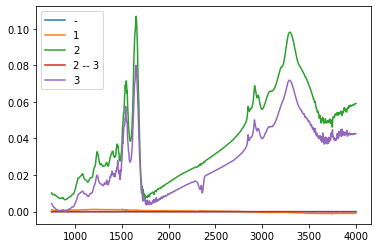

In [65]:
for name, df in joined.groupby(level = "Grade"):
    
    plt.plot(df.mean(axis = 0, numeric_only = True), label = name)
    
plt.legend()

In [51]:
joined.to_pickle("/home/conor/Desktop/2085-b/BR2085b specs.pickle")

In [49]:
[col_name for col_name in joined.columns if type(col_name) is str]

[]

In [50]:
TMA_df.shape

(324718, 1626)

In [91]:
TMA_df.to_pickle("/home/conor/Desktop/1003.pickle")